# Clustering animals with attributes

In this notebook, we'll get a feel for clustering by applying **k-means** and **average linkage** to cluster a collection of animals.

The data set we'll work with is called `Animals with Attributes 2`. It contains information about 50 animals. For each, it has 85 real-valued features that capture various properties of the animal: where it lives, what it eats, and so on.

The file `'classes.txt'` contains the names of the 50 animals. The file `'predicate-matrix-continuous.txt'` contains the data itself: 85 attributes per animal.

## Background 
In ealier work, i.e. python notebooks, work was done to build predictive models of data, classifiers, and regressors using ``supervised learning`` methods. Supervised learning algorithms are presented with labeled data sets, where the training data is labeled by an expert in that field. The algorithm uses given input and output examples of a desired model and finds the best model via optimization. This model is then used for prediction and classification using new data.

But in reality, working with labeled data isn't always possible and we must resort to ``unsupervised learning`` methods. For unsupervised learning algorithms, no training labels are given so that an algorithm must discover patterns in the data and build appropriate models to determine how to cluster and classify new data. The efficacy of these predictive methods, depends crucially on having a good representation of the data. Hence, good representations makes learning easier. A good representation brings out the true degrees of freedom in the data. It captures structure in the data at many different scales. It helps screen out noise and downweights irrelevant features.

We will focus on uncovering certain key types of structure, especially clusters and linear projections.

## Load the data set

Standard includes as well as some modules for k-means and hierarchical clustering.

In [93]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [94]:
# Load in animal names
f = open('classes.txt')
lines = f.readlines()
names = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
names = [w.replace('+', ' ') for w in names] # get rid of '+'

# Load attribute matrix
x = np.loadtxt('predicate-matrix-continuous.txt')

In [95]:
# Data sample
print str(names[0:10]) + '\n'
print x[0,:]
print '\n Missing values in the numeric table are marked by -1.'

['antelope', 'grizzly bear', 'killer whale', 'beaver', 'dalmatian', 'persian cat', 'horse', 'german shepherd', 'blue whale', 'siamese cat']

[-1.   -1.   -1.   -1.   12.34  0.    0.    0.   16.11  9.19  0.   38.09
  4.44 28.55 38.75  5.68 17.07 39.99  0.    0.   67.08  7.78  0.   60.24
 16.8  40.59 29.7   5.56  2.47  0.   87.43  0.    8.64  9.04  0.    9.23
  1.23  0.   54.58 70.86  3.33 33.56  8.15 26.14  0.   67.85 41.19  7.36
  1.11  6.94 62.32  0.    4.44  0.   57.76 12.63 33.24 61.86  0.    0.
  0.    0.   22.72 55.81  5.9   0.    0.   19.88 54.79  4.94 40.97  0.
 22.32  0.   57.14  0.    0.    1.23 10.49 39.24 17.57 50.59  2.35  9.7
  8.38]

 Missing values in the numeric table are marked by -1.


## Dealing with missing data

We can use different interpolation techniques to estimate the missing values from training data samples. One of the most common technique is ``mean imputation``, where we simply replace the missing value by the mean value of the entire feature column. 

In [96]:
import pandas as pd
x_df = pd.DataFrame(x) 
x_df = x_df.replace(-1, np.nan)

In [97]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(x_df)
x_df_imp  = imr.transform(x_df.values)
x_df_imp[0,:]

array([36.09489796, 27.42367347,  4.31979592, 39.51918367, 12.34      ,
        0.        ,  0.        ,  0.        , 16.11      ,  9.19      ,
        0.        , 38.09      ,  4.44      , 28.55      , 38.75      ,
        5.68      , 17.07      , 39.99      ,  0.        ,  0.        ,
       67.08      ,  7.78      ,  0.        , 60.24      , 16.8       ,
       40.59      , 29.7       ,  5.56      ,  2.47      ,  0.        ,
       87.43      ,  0.        ,  8.64      ,  9.04      ,  0.        ,
        9.23      ,  1.23      ,  0.        , 54.58      , 70.86      ,
        3.33      , 33.56      ,  8.15      , 26.14      ,  0.        ,
       67.85      , 41.19      ,  7.36      ,  1.11      ,  6.94      ,
       62.32      ,  0.        ,  4.44      ,  0.        , 57.76      ,
       12.63      , 33.24      , 61.86      ,  0.        ,  0.        ,
        0.        ,  0.        , 22.72      , 55.81      ,  5.9       ,
        0.        ,  0.        , 19.88      , 54.79      ,  4.94

## Unsupervised Learning 1: k-means clustering

We now run Lloyd's algorithm to obtain a flat clustering of the data. In the code below, we ask for `k = 15` clusters, but other choices can be experimented too.

We do random initialization, which means that different runs of the algorithm will potentially have different outcomes.

In [114]:
# Run Lloyd's algorithm
def kmeans(data):
    
    k = 15 # number of clusters
    kmeans = KMeans(n_clusters=k, init='random') # init='k-means++'
    kmeans.fit(data)
    print '\n' + str(kmeans.labels_) + '\n'

    # Get a list of the animals in each cluster
    clusters = []
    for j in range(0,k):
        clusters.append([]) # Initialize an empty list of strings
    
    for i in range(0,50):
        clusters[kmeans.labels_[i]].append(names[i])

    # Print out clusters
    for j in range(0,k):
        print j, clusters[j] # j+1 --> labels 1 to 15

In [116]:
kmeans(x_df_imp)


[14 12  6  4  5  5 14  2 11  5  8  4  7 10  7  9  1 11 10  1 10  2 10 13
  1  4  8 10  4  0  3  2  5  8  4 13 10 14 10 14  2 10  7  4 12  5 13  8
 10 13]

0 ['bat']
1 ['spider monkey', 'gorilla', 'chimpanzee']
2 ['german shepherd', 'fox', 'wolf', 'bobcat']
3 ['giraffe']
4 ['beaver', 'mole', 'hamster', 'rabbit', 'weasel', 'mouse']
5 ['dalmatian', 'persian cat', 'siamese cat', 'chihuahua', 'collie']
6 ['killer whale']
7 ['tiger', 'leopard', 'lion']
8 ['skunk', 'squirrel', 'rat', 'raccoon']
9 ['moose']
10 ['hippopotamus', 'elephant', 'ox', 'sheep', 'rhinoceros', 'buffalo', 'giant panda', 'pig', 'cow']
11 ['blue whale', 'humpback whale']
12 ['grizzly bear', 'polar bear']
13 ['seal', 'otter', 'walrus', 'dolphin']
14 ['antelope', 'horse', 'zebra', 'deer']


## Unsupervised Learning 2: Hierarchical clustering (Dendrogram)

Another commonly used unsupervised algorithm for clustering data is a dendrogram. Hierarchical clustering methods are generated either from a top-down or a bottom-up approach. 

``Agglomerative:`` Or bottom-up approach, each data point is its own cluster initially. The data is merged in pairs as one creates a hierarchy of clusters. The merging of data eventually stops once all the data has been merged into a single über cluster. 

``Divisive:`` Or top-down approach, all data points are initially part of a single giant cluster. The data is then recursively split into smaller and smaller clustese divisive method can split the data until each data point is its own node.

Here, we will focus on agglomerative hierarchical clustering use the built-in hierarchical clustering module of `scipy` to apply **Ward's method** to the data. 

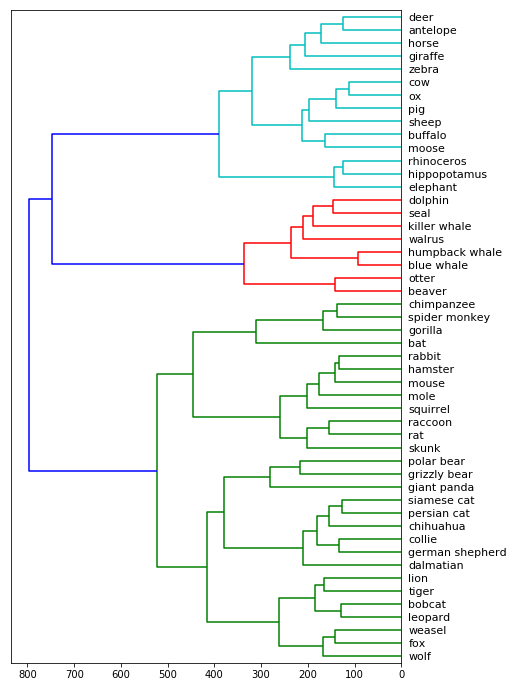

In [117]:
# Adjust figure size to accommodate the full tree
from pylab import rcParams
rcParams['figure.figsize'] = 7, 12

# Do hierarchical clustering using Ward's method
z = sch.linkage(x_df_imp, method='ward')

# Display dendrogram
info = sch.dendrogram(z, orientation='left', labels=names, leaf_font_size=11)